In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../science.mplstyle")

import pickle

from helpers.plotting import *


In [4]:
project_id = "lowmass"
path_to_compiled_data = f"/pscratch/sd/r/rmastand/dimuonAD/compiled_data/{project_id}"

codes_list = ["DATA_nojet"]

uncut_data = {}
for code in codes_list:
    with open(f"{path_to_compiled_data}/{code}", "rb") as ifile:
        uncut_data[code] = pickle.load(ifile)
    
    
    print(code, list(uncut_data[codes_list[0]].keys()), uncut_data[code][list(uncut_data[code].keys())[0]].shape)
 
vars_to_plot = list(uncut_data[codes_list[0]].keys())

DATA_nojet ['muon_iso03', 'mu0_eta', 'mu1_eta', 'mu0_pt', 'mu1_pt', 'mu0_phi', 'mu1_phi', 'muon_iso04', 'dimu_pt', 'dimu_eta', 'dimu_phi', 'n_muons', 'n_jets', 'dimu_mass', 'mumu_deltaR', 'mumu_deltapT'] (21803678,)


In [5]:
# small cut on jet pt (necessary for BSM_XYY)
"""
jet_pt_cut = 0
btag_cut = 0.0

dimu_M_cut_low = 0
dimu_M_cut_high = 1000000

filters_nano, filters_ed = {}, {}

for code in uncut_data.keys():
    
    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)\
                        &(uncut_data[code]["jet0_btag"]>=btag_cut)\
                        &(uncut_data[code]["jet1_btag"]>=btag_cut)\
                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)\
                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)
"""

'\njet_pt_cut = 0\nbtag_cut = 0.0\n\ndimu_M_cut_low = 0\ndimu_M_cut_high = 1000000\n\nfilters_nano, filters_ed = {}, {}\n\nfor code in uncut_data.keys():\n    \n    filters_nano[code] = (uncut_data[code]["dijet_pt"]>jet_pt_cut)                        &(uncut_data[code]["jet0_btag"]>=btag_cut)                        &(uncut_data[code]["jet1_btag"]>=btag_cut)                        &(uncut_data[code]["dimu_mass"]>=dimu_M_cut_low)                        &(uncut_data[code]["dimu_mass"]<dimu_M_cut_high)\n'

In [6]:


colors_dict = {
    "DATA_nojet":"purple", 
    "BSM_HAA":"red", 
    "SM_SIM":"blue",
    "wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full":"red",
    "cmssim":"blue"
    }





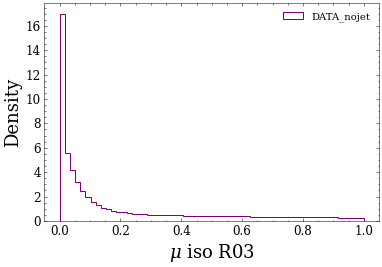

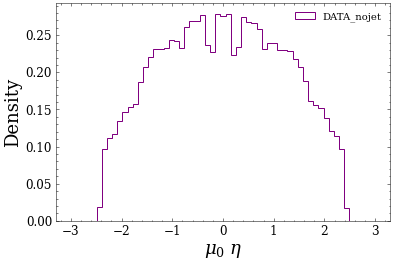

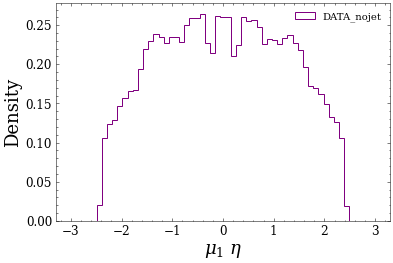

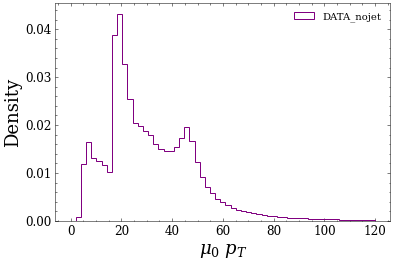

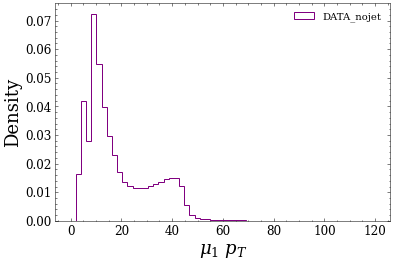

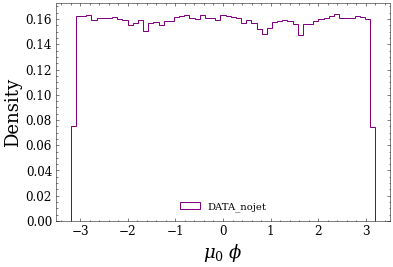

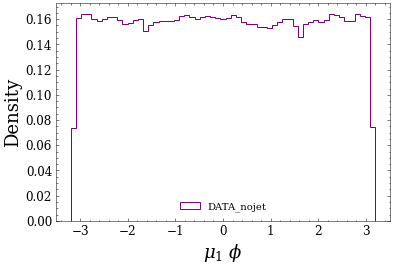

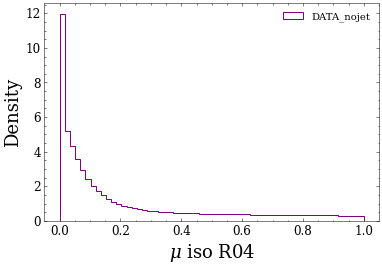

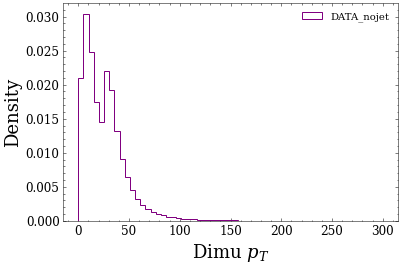

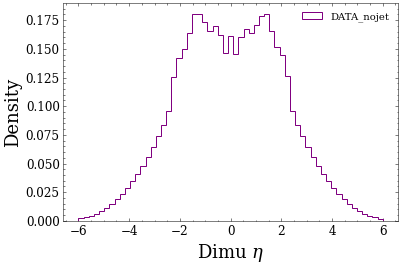

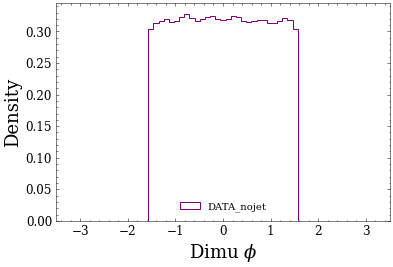

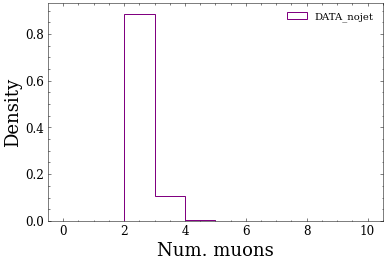

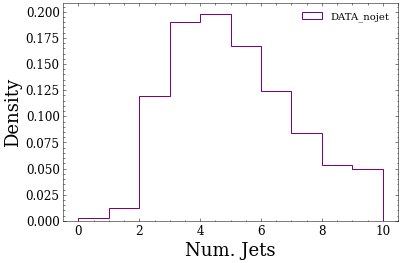

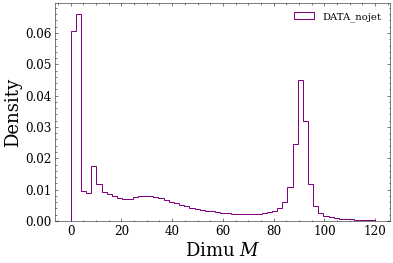

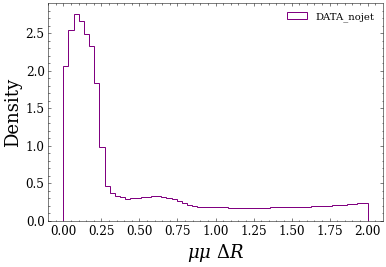

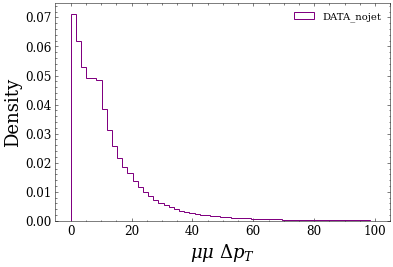

In [7]:

for var in vars_to_plot:
    plt.figure()
    
    # left: new s, b
    for code in uncut_data.keys():
        
        
        
        plt.hist(uncut_data[code][var], bins = feature_bins[var], 
                 histtype = "step", density = True, label = code[:10], color = colors_dict[code])
        
 
        
    plt.xlabel(feature_labels[var])
    plt.ylabel("Density")
    plt.legend()
    plt.show()


Look at the Samesign muon spectru

In [60]:
analysis_type = "upsilon"

if analysis_type == "upsilon":
    mass = 9.46
elif analysis_type == "jpsi":
    mass = 3.1
elif analysis_type == "eta":
    mass = 0.547
    
lower_bound, upper_bound = mass-1, mass+1


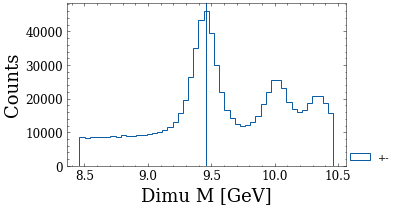

In [61]:



plt.figure(figsize = (5,3))

plt.hist(uncut_data["DATA_nojet"]["dimu_mass"], bins = np.linspace(lower_bound, upper_bound, 50), 
        histtype = "step", label = f"+-")

plt.axvline(mass)

plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()



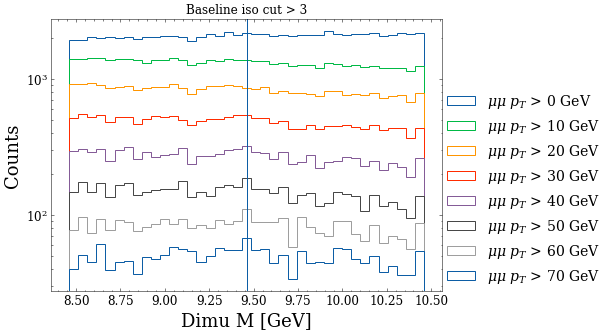

In [67]:
muon_iso_cuts = np.arange(0.0, 2., 0.25) # anti-isolation cut -- want muon iso to be ABOVE this, which means more junk
dimuon_pt_cuts = [0, 10, 20, 30, 40, 50, 60, 70]

isoc = 3
ptc = 0

cut_pt = True


plt.figure(figsize = (7,5))
    

if cut_pt:
    for ptc in dimuon_pt_cuts: 
        loc_filter = (uncut_data["DATA_nojet"]["muon_iso03"]>=isoc)  &(uncut_data["DATA_nojet"]["dimu_pt"]>=ptc) 
        plt.hist(uncut_data["DATA_nojet"]["dimu_mass"][loc_filter], bins = np.linspace(lower_bound, upper_bound, 40), 
                histtype = "step", 
                label = f"$\mu\mu$ $p_T$ > {round(ptc, 2)} GeV")
        if isoc > 0:
            plt.title(f"Baseline iso cut > {isoc}")

else:
    for isoc in muon_iso_cuts: 
        loc_filter = (uncut_data["DATA_nojet"]["muon_iso03"]>=isoc)  &(uncut_data["DATA_nojet"]["dimu_pt"]>=ptc) 
        plt.hist(uncut_data["DATA_nojet"]["dimu_mass"][loc_filter], bins = np.linspace(lower_bound, upper_bound, 40), 
                histtype = "step", 
                 label = f"$\mu\mu$ iso R03 > {round(isoc, 2)}")



plt.axvline(mass)
plt.yscale("log")
plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0), fontsize = 14)
plt.show()

